In [153]:
import pandas as pd


# Import data set

In [154]:

data = pd.read_csv("weight-height.csv")


In [155]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [156]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [157]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# Encoding "Gender" Feature 

In [158]:
from sklearn.preprocessing import LabelEncoder

In [159]:
label_encoding = LabelEncoder()

data["Gender"] = label_encoding.fit_transform(data["Gender"])

In [160]:
# meal = 1 and Femeal = 0
data.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Seperate x and y

In [161]:
x = data.drop("Weight", axis = 1)
y = data["Weight"]

In [162]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

# Apply Linear Regression

In [163]:
LR = LinearRegression()

In [164]:
xtrain , xtest , ytrain , ytest = tts(x,y, train_size = .70 , random_state = 1)
LR.fit(xtrain,ytrain)

LinearRegression()

In [165]:
Predicted_data = LR.predict(xtest)

In [166]:
Predicted_data

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [167]:
data["Predicted_data"] = LR.predict(x)

In [168]:
data.tail()

,Gender,Height,Weight,Predicted_data
8550,0,60.483946,110.565497,116.468265
8551,0,63.423372,129.921671,134.013329
8552,0,65.584057,155.942671,146.910187
8553,0,67.429971,151.678405,157.928220
8554,0,60.921791,131.253738,119.081708


# Evaluate Model

In [169]:
#Accuracy 
LR.score(xtest,ytest)

0.9059959607091161

In [170]:
# MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,Predicted_data)
print(mse)

99.67250998070027


In [171]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest,Predicted_data)
print(mae)

7.982132592729127


# Apply KNN Regressor

In [172]:
from sklearn.neighbors import KNeighborsRegressor

In [173]:
KNNR = KNeighborsRegressor()
KNNR.fit(xtrain,ytrain)

KNeighborsRegressor()

In [174]:
KNN_Predict = KNNR.predict(xtest)

In [175]:
data["KNN_Predict"] = KNNR.predict(x)

In [176]:
data.head()

,Gender,Height,Weight,Predicted_data,KNN_Predict
0,1,73.847017,241.893563,215.574352,222.249723
1,1,68.781904,162.310473,185.341329,181.243871
2,1,74.110105,212.740856,217.144694,220.883791
3,1,71.730978,220.042470,202.943984,199.347460
4,1,69.881796,206.349801,191.906445,193.719655


# Evaluate Model

In [177]:
#Accuracy
KNNR.score(xtest,ytest)

0.8838502073708883

In [178]:
#MSE
mse = mean_squared_error(ytest,KNN_Predict)
print(mse)

123.15365863436983


In [179]:
#MAE
mae = mean_absolute_error(ytest,KNN_Predict)
print(mae)

8.850747809837165


# I think LinearRegrassion Model is Best

# Import data set

In [180]:
data2 = pd.read_csv("weight-height.csv")

In [181]:
data2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Encoding "Gender" Label 

In [182]:
data2["Gender"] = label_encoding.fit_transform(data2["Gender"])
data2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


# Seperate x and y

In [183]:
x = data2.drop("Gender", axis = 1 )
y = data2["Gender"]

# Traing Data

In [184]:
xtrain , xtest , ytrain, ytest = tts(x,y, test_size = .30 , random_state = 1 )

# Apply Decision Tree Classifier

In [185]:
from sklearn.tree import DecisionTreeClassifier

In [186]:
dts = DecisionTreeClassifier()
dts.fit(xtrain,ytrain)
dts_predict = dts.predict(xtest)
print(dts_predict)

[1 1 1 ... 0 1 1]


In [187]:
import numpy as np
np.array(ytest)

array([0, 1, 1, ..., 0, 1, 1])

In [188]:
data2["dts_predict"] = dts.predict(x)
print(data2.head())

   Gender     Height      Weight  dts_predict
0       1  73.847017  241.893563            1
1       1  68.781904  162.310473            1
2       1  74.110105  212.740856            1
3       1  71.730978  220.042470            1
4       1  69.881796  206.349801            1


# Evaluate Model

In [189]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , plot_roc_curve

In [190]:
cr = classification_report(ytest,dts_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1055
           1       0.89      0.91      0.90      1512

    accuracy                           0.88      2567
   macro avg       0.88      0.88      0.88      2567
weighted avg       0.88      0.88      0.88      2567



In [191]:
cm = confusion_matrix(ytest,dts_predict)
print(cm)

[[ 888  167]
 [ 134 1378]]


In [192]:
As = accuracy_score(ytest,dts_predict)
print(As)

0.8827425009738995


Text(33.0, 0.5, 'Predicted Values')

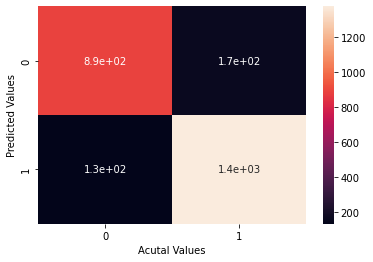

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot = True)
plt.xlabel("Acutal Values")
plt.ylabel("Predicted Values")

In [194]:
tp , fn, fp ,tn = confusion_matrix(ytest,dts_predict).reshape(-1)

# Accuracy

In [195]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
print(accuracy)

if As == accuracy:
    print("True")
else:
    print("Flase")

0.8827425009738995
True


# Precision Of Positive Predictive Value as PPPV 

In [196]:
ppv = tp/(tp+fp)
print(ppv)

0.8688845401174168


# Sensitivity, Recall Hit Rate as TRP 

In [197]:
trp = tp/(tp+fn)
print(trp)

0.8417061611374408


# Flase Positive Rate or 1-Specificity 

In [198]:
fpr = fp/(fp+tn)
print(fpr)

0.08862433862433862


# F1 Score

In [199]:
f1_score = (ppv*trp)/(ppv+trp)
print(f1_score)

0.4275397207510833


# Specificity or Selectivity 

In [200]:
trn = tn/(tn+fp)
print(trn)

0.9113756613756614


# Treat Score , Critical Success or Index(CSI) 

In [201]:
csi = tp/(tp+fn+fp)
print(csi)

0.7468460891505467


# False Discovery Rate 

In [202]:
fdr = fp/(tp+fp)
print(fdr)

0.13111545988258316


# ROC and AUC Curve

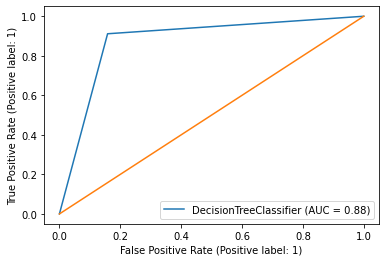

In [203]:
plot_roc_curve(dts,xtest,ytest)
plt.plot([0,1],[0,1])

# AUC = 0.87

# Apply KNN Classifier

In [204]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
KNC = KNeighborsClassifier()
KNC.fit(xtrain,ytrain)
KNC_Predict = KNC.predict(xtest)
print(KNC_Predict)

[1 1 1 ... 0 1 1]


In [206]:
data2["KNC_Predict"] = KNC.predict(x)
print(data2.head())

   Gender     Height      Weight  dts_predict  KNC_Predict
0       1  73.847017  241.893563            1            1
1       1  68.781904  162.310473            1            1
2       1  74.110105  212.740856            1            1
3       1  71.730978  220.042470            1            1
4       1  69.881796  206.349801            1            1


# Evaluate Model

In [207]:
cr = classification_report(ytest,KNC_Predict)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1055
           1       0.92      0.93      0.93      1512

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



[[ 938  117]
 [ 102 1410]]


Text(33.0, 0.5, 'Predicted Values')

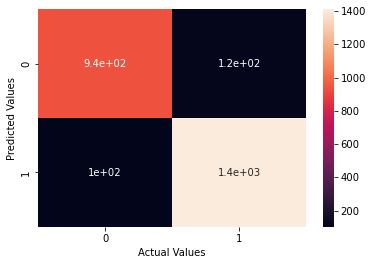

In [208]:
cm = confusion_matrix(ytest,KNC_Predict)
print(cm)

sns.heatmap(cm,annot = True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Accuracy score ans Accuracy

In [210]:
tp , fn, fp ,tn = confusion_matrix(ytest,KNC_Predict).reshape(-1)

As2 = accuracy_score(ytest,KNC_Predict)
print(As2)

accuracy2 = (tp+tn)/(tp+fn+fp+tn)
print(accuracy2)

0.9146864043630697
0.9146864043630697


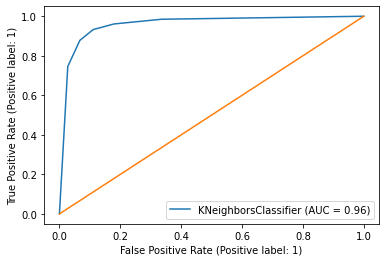

In [212]:
plot_roc_curve(KNC,xtest,ytest)
plt.plot([0,1],[0,1])


# AUC = 0.96

# Precision 

In [214]:
ppv2 = tp/(tp+fp)
print(ppv2)

0.9019230769230769


# Sensitivity , Recall , Hit Rate

In [216]:
trp2 = tp/(tp+fn)
print(trp2)

0.8890995260663507



# False Positive Rate or 1-Specificity

In [217]:
fpr2 = fp/(fp+tn)
print(fpr2)

0.06746031746031746


# F-1 Measure

In [218]:
F_1_Measure = (ppv2+trp2)/2
print(F_1_Measure)

0.8955113014947138


# F1 Score 

In [219]:
f1_score = (2*ppv2*trp2)/(ppv2+trp2)
print(f1_score)

0.8954653937947494


# Specificity , Selectivity 

In [221]:
ss = tn/(tn+fp)
print(ss)

0.9325396825396826


# Threat Score , Critical Success , Index(CSI)

In [223]:
CSI = tp/(tp+fn+fp)
print(CSI)

0.8107173725151253


# False Discovery Rate 

In [224]:
FDR = fp/(tp+fp)
print(FDR)

0.09807692307692308


# I think KNN Classifier Model is best